### Inference

In [35]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from PIL import Image
import torchvision
import numpy as np
from dataset import get_dataset
from torch.utils.data import DataLoader

In [26]:
#https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html

def visualize_model(model, dataloader, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig, ax = plt.subplots(1,6, figsize = (12,10))

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloader):
            inputs = inputs.to(device)
            labels = labels.to(device)

            print(inputs.cpu().data.numpy().shape)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            ax[images_so_far].axis("off")
            ax[images_so_far].set_title('predicted: {}'.format("cat" if preds == 0 else "dog"))
            ax[images_so_far].imshow(inputs.squeeze(0).permute(1,2,0).cpu().numpy())
            images_so_far += 1

            if images_so_far == num_images:
                model.train(mode=was_training)
                return
        model.train(mode=was_training)

In [2]:
#Hyperparameters
BATCH_SIZE = 1
NUM_WORKERS = 0

#Load data
dataset = get_dataset(split_size=0.2)
test_loader = DataLoader(dataset['test'], batch_size=BATCH_SIZE, shuffle=True, num_workers=NUM_WORKERS)

In [3]:
#Load model

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = torchvision.models.densenet161(pretrained=True)

for param in model.parameters():
    param.requires_grad = False

model.classifier = nn.Linear(2208, 2)
model.to(device)
model.load_state_dict(torch.load("model_checkpoint.pth.tar")['state_dict'])

<All keys matched successfully>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
(1, 3, 224, 224)
(1, 3, 224, 224)
(1, 3, 224, 224)
(1, 3, 224, 224)
(1, 3, 224, 224)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
(1, 3, 224, 224)


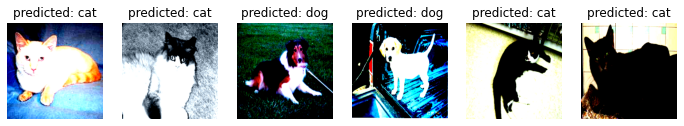

In [27]:
visualize_model(model, test_loader, num_images=6)

In [46]:
test_img = Image.open("test.png")
test_img = test_img.resize((224, 224))
plt.imshow(test_img)

TypeError: unsupported operand type(s) for /: 'Image' and 'float'

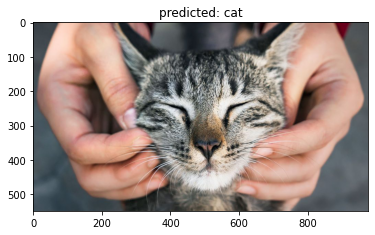

In [49]:
test_tensor = torch.Tensor(np.array(test_img)/255.0).permute(2,0,1).unsqueeze(0)

model.eval()
with torch.no_grad():
    test_tensor = test_tensor.to(device)
    outputs = model(test_tensor)
    _, preds = torch.max(outputs, 1)
    plt.title('predicted: {}'.format("cat" if preds == 0 else "dog"))
    plt.imshow(test_tensor.squeeze(0).permute(1,2,0).cpu().numpy())